# Data Analysis

In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fitparse import FitFile
import gpxpy
import gpxpy.gpx

## Load Data

In [87]:
path = "path_1"
acc_file = None
gps_file = None
for f in os.listdir(path):
    if f.endswith(".csv"):
        acc_file = f
    if f.endswith(".FIT"):
        gps_file = f

# Acceleration data
acc_data = pd.read_csv(path + "/" + acc_file, sep=";", header=1, names=["time", "ax", "ay", "az", "norm"])

# GPS data

def semicircles2rad(list):
    """Convert semicircle data from FIT file to dms data

    Args:
        list (list): List of semicircle values

    Returns:
        list: list of dms values
    """
    const = 180 / 2**31
    for i in range(len(list)-1):
        list[i] = list[i] * const
    return list


time = []
alt = []
lat = []
long = []
units = {"alt" : "", "lat": "", "long": ""}

gps_fit_file = fitfile = FitFile(path + "/" + gps_file)

for record in fitfile.get_messages("record"):
    for record_data in record:
        if record_data.name == "timestamp":
            time.append(record_data.value)
        if record_data.name == "altitude":
            alt.append(record_data.value)
            if units["alt"] == "":
                units["alt"] = record_data.units
        if record_data.name == "position_lat":
            lat.append(record_data.value)
            if units["lat"] == "":
                units["lat"] = record_data.units
        if record_data.name == "position_long":
            long.append(record_data.value)
            if units["long"] == "":
                units["long"] = record_data.units

lat = semicircles2rad(lat)
long = semicircles2rad(long)
gps_data = pd.DataFrame(list(zip(time, lat, long, alt)), columns= ["time", "lat", "long", "alt"])


In [107]:
path = "path_3"
acc_file = None
gps_file = None
for f in os.listdir(path):
    if f.endswith(".csv"):
        acc_file = f
    if f.endswith(".gpx"):
        gps_file = f

# Acceleration data
acc_data = pd.read_csv(path + "/" + acc_file, sep=";", header=1, names=["time", "ax", "ay", "az", "norm"])

# GPS data
gpx_file = open(path + "/" + gps_file, "r")
gpx = gpxpy.parse(gpx_file)

time = []
lat = []
long = []
alt = []
units = {"alt" : "", "lat": "", "long": ""}
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            print("{0} Point at ({1},{2}) -> {3}".format(point.time, point.latitude, point.longitude, point.elevation))
            time.append(point.time)
            lat.append(point.latitude)
            long.append(point.longitude)
            alt.append(point.elevation)
gps_data = pd.DataFrame(list(zip(time, lat, long, alt)), columns= ["time", "lat", "long", "alt"])


2023-03-01 17:26:20+00:00 Point at (48.519060742110014,7.741795917972922) -> None
2023-03-01 17:26:33+00:00 Point at (48.51918127387762,7.741988450288773) -> None
2023-03-01 17:26:36+00:00 Point at (48.519293926656246,7.742096493020654) -> None
2023-03-01 17:26:40+00:00 Point at (48.519325191155076,7.74221115745604) -> None
2023-03-01 17:26:45+00:00 Point at (48.5192877240479,7.742349039763212) -> None
2023-03-01 17:26:49+00:00 Point at (48.519105250015855,7.7423380594700575) -> None
2023-03-01 17:26:52+00:00 Point at (48.51887826807797,7.742221551015973) -> None
2023-03-01 17:26:54+00:00 Point at (48.518728567287326,7.742069000378251) -> None
2023-03-01 17:26:56+00:00 Point at (48.518576519563794,7.741858530789614) -> None
2023-03-01 17:26:58+00:00 Point at (48.51843075826764,7.741629788652062) -> None
2023-03-01 17:27:00+00:00 Point at (48.51832036860287,7.741419151425362) -> None
2023-03-01 17:27:01+00:00 Point at (48.518283823505044,7.741306917741895) -> None
2023-03-01 17:27:02+00

## Acceleration Data

In [108]:
acc_data

,time,ax,ay,az,norm
0,18:26:10:3680,"0,1049","0,3893","0,8979","0,983"
1,18:26:10:3700,"0,0977","0,3936","0,8972","0,983"
2,18:26:10:3720,"0,0933","0,3977","0,8932","0,981"
3,18:26:10:3740,"0,0879","0,3972","0,8966","0,984"
4,18:26:10:3770,"0,0902","0,3938","0,9009","0,986"
...,...,...,...,...,...
343503,18:54:58:7360,"-0,2608","0,4729","0,8856","1,044"
343504,18:54:58:7400,"-0,2674","0,4663","0,8905","1,046"
343505,18:54:58:7420,"-0,2660","0,4627","0,8955","1,049"
343506,18:54:58:7450,"-0,2518","0,4640","0,8889","1,040"


In [109]:
acc_data.describe()

,time,ax,ay,az,norm
count,343508,343508,343508,343508,343508
unique,343508,7846,9587,6539,935
top,18:26:10:3680,"0,6958","0,0015","0,7755","1,030"
freq,1,343,246,387,3387


In [110]:
# acc_data.hist(column="ax")

In [111]:
acc_data.isna().sum()

time    0
ax      0
ay      0
az      0
norm    0
dtype: int64

Text(0.5, 1.0, 'Acceleration Z')

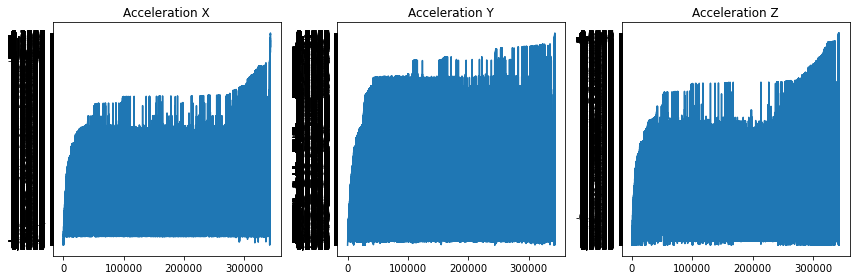

In [112]:
nb_measure = acc_data.shape[0]

fig, axs = plt.subplots(1,3)
fig.set_tight_layout(True)
fig.set_size_inches(12, 4)
axs[0].plot(range(nb_measure), acc_data["ax"])
axs[0].set_title("Acceleration X")
axs[1].plot(range(nb_measure), acc_data["ay"])
axs[1].set_title("Acceleration Y")
axs[2].plot(range(nb_measure), acc_data["az"])
axs[2].set_title("Acceleration Z")

## GPS Data

In [113]:
gps_data

,time,lat,long,alt
0,2023-03-01 17:26:20+00:00,48.519061,7.741796,None
1,2023-03-01 17:26:33+00:00,48.519181,7.741988,None
2,2023-03-01 17:26:36+00:00,48.519294,7.742096,None
3,2023-03-01 17:26:40+00:00,48.519325,7.742211,None
4,2023-03-01 17:26:45+00:00,48.519288,7.742349,None
...,...,...,...,...
1304,2023-03-01 17:54:29+00:00,48.407797,7.445543,None
1305,2023-03-01 17:54:31+00:00,48.407800,7.445569,None
1306,2023-03-01 17:54:38+00:00,48.407833,7.445498,None
1307,2023-03-01 17:54:44+00:00,48.407838,7.445473,None


In [114]:
units # Check if data has been converted when loading

{'alt': '', 'lat': '', 'long': ''}

In [115]:
gps_data.describe()

,lat,long
count,1309.000000,1309.000000
mean,48.483774,7.591514
std,0.040512,0.093606
min,48.406857,7.445463
25%,48.447946,7.505019
50%,48.503242,7.580668
75%,48.519112,7.670096
max,48.526279,7.742349


array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>, <AxesSubplot:>]],
      dtype=object)

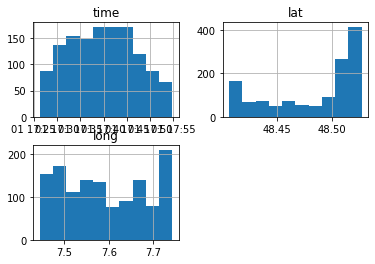

In [116]:
gps_data.hist()

In [117]:
gps_data.isna().sum()

time       0
lat        0
long       0
alt     1309
dtype: int64

## Tests

In [118]:
import gmplot

min_lat, max_lat = min(gps_data["lat"]), max(gps_data["lat"])
min_lon, max_lon = min(gps_data["long"]), max(gps_data["long"])
# mymap = gmplot.GoogleMapPlotter(48.57, 7.75, 16) # Strasbourg
mymap = gmplot.GoogleMapPlotter(min_lat + (max_lat - min_lat) / 2,
                                min_lon + (max_lon - min_lon) / 2,
                                12)
mymap.plot(gps_data["lat"], gps_data["long"], "red", edge_width=2)
mymap.draw("/home/fabien/TPS/2A/ProjetIngenieur/helbert/data/2023_03_02/map.html")

In [119]:
import webbrowser
webbrowser.open("/home/fabien/TPS/2A/ProjetIngenieur/helbert/data/2023_03_02/map.html")

True

In [120]:
from IPython.display import display, HTML
display(src="/home/fabien/TPS/2A/ProjetIngenieur/helbert/data/2023_03_02/map.html")

In [121]:
from IPython.display import IFrame
IFrame(src="/home/fabien/TPS/2A/ProjetIngenieur/helbert/data/2023_03_02/map.html", width=700, height=600)